Question 1:

$$ \sum_{i=1}^{n}(Y_i-\beta_1X_{i1}-\beta_2X_{i2}-...\beta_pX_{ip}$$

As given in the question, we can break up the large sum into smaller sums and simplify the equation because each $X_{ik}$ can be defined as an indicator function $X_{ik} = I(i \in G_k)$ 

Thus we can rewrite the sum:

$$ \sum_{i\in G_1}(Y_i-\beta_1X_{i1})^2 + \sum_{i\in G_2} (Y_i-\beta_2X_{i2})^2 + ... +\sum_{i\in G_p}(Y_i-\beta_pX_{ip})^2 $$

Now, we know that for all i in $G_1$, $X_i$ is assigned the value 1.

Thus:
$$ \sum_{i\in G_1}(Y_i-\beta_1)^2 + \sum_{i\in G_2} (Y_i-\beta_2)^2 + ... +\sum_{i\in G_p}(Y_i-\beta_p)^2 $$

We can then evaluate the sum for the kth group:

$$ \sum_{i\in G_k}(Y_i-\beta_k)^2$$

After differentiating with respect to $\beta_k$:

$$ 2*\sum_{i\in G_k}(Y_i-\beta_k) = 0$$

$$ \sum_{i\in G_k}(Y_i-\beta_k) = 0$$

Since $\beta_k$ does not deped on $i$, we can take it out of the sum

$$ (\sum_{i\in G_k}Y_i) - \beta_k\sum_{i\in G_k}1 = 0$$

Thus, 

$$ \sum_{i\in G_k}Y_i = \beta_kn_k $$

$$ \frac{\sum_{i\in G_k}Y_i} {n_k} = \bar Y^{(k)} $$

--2019-09-11 22:09:13--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611966 (1.5M) [text/plain]
Saving to: ‘kirby21.csv.50’

kirby21.csv.50      100%[===================>]   1.54M  --.-KB/s    in 0.07s   

2019-09-11 22:09:13 (21.3 MB/s) - ‘kirby21.csv.50’ saved [1611966/1611966]

LinregressResult(slope=1.0675677731655153, intercept=-694.180922147847, rvalue=0.9627048718978265, pvalue=1.157832145522277e-11, stderr=0.07071630900773986)
Beta1 = 1.0675677731655158
Beta0 = -694.1809221478507
In Sample Error Rate = 832740.3005383236


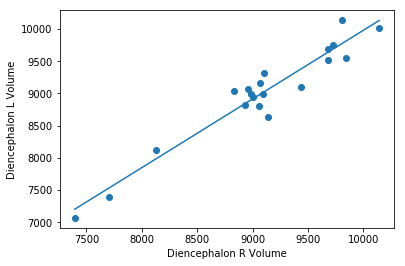

In [65]:
#Question 2

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

#import the data
! if [ ! -e kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
data = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

#locate the diencephalon rows and extract their volumes
data = data.loc[((data.roi == "Diencephalon_L") | (data.roi == "Diencephalon_R")) & (data.type == 1) & (data.level == 1)]
leftvals = data[data['roi'] == 'Diencephalon_L'].iloc[:]['volume'].values
rightvals = data[data['roi'] == 'Diencephalon_R'].iloc[:]['volume'].values

#plots the scatter plot with the extracted values
plt.scatter(rightvals,leftvals)
plt.xlabel('Diencephalon R Volume')
plt.ylabel('Diencephalon L Volume')

#computes the regression fit and graphs the regression line
print(st.linregress(x = rightvals, y = leftvals))
b1 = st.pearsonr(rightvals, leftvals)[0] * np.std(leftvals) / np.std(rightvals)
b0 = np.mean(leftvals) - np.mean(rightvals) * b1
print('Beta1 = ' + str(b1))
print('Beta0 = ' + str(b0))
sns.lineplot(rightvals, b0 + b1 * rightvals)

#computes the in sample error rate
error = 0
for ii in range(len(rightvals)):
  error = error + np.power((leftvals[ii]-b0-(b1*rightvals[ii])), 2)
print("In Sample Error Rate = " + str(error))

Question 3:

I want to compare the transfer spending of european soccer clubs to the amount of games they will win in the upcoming season. I want to use the data from the previous season to create a regression fit, and use that data to predict the amount of wins from this season.

Link to Transfer 
Data:

https://github.com/ewenme/transfers/blob/master/data/2018/english_premier_league.csv

https://github.com/ewenme/transfers/blob/master/data/2019/english_premier_league.csv